In [1]:
#imports!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from IPython.display import Image
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler

# The Prediction Conundrum
## Can we accurately predict outcomes of gaming and sports competitions?

## 1. Introduction

### 1.1 The Question:
Since the invention of competitions, gambling on and predicting outcomes of a match has been an infatuation of many people around the world. One of the oldest recorded occurances of gambling was in ancient china, where people would bet on fighting animals. As time has progressed, so have all sports evolved, but one thing has stayed the same - people trying to predict who would win.
Since the invention of AI, it has been tought, that technology could soon develop enough, to allow the computer to accurately predict such outcomes 100% of the time, but can we achieve this now? Or is such a feat impossible, even for a machine learning model?

Let's find out!

### 1.2 Course of Action
How should we proceed?
The answer is simple - let us gather data and see if we can make a model, that can predict outcomes at least 90% of the time. This means we are looking for a model with 0.9 precision. Preferably we also want our model to have low bias and low variance, but as we may soon find out - this may be an *almost* impossible feat.

What data do we need and how we are going to get it?
Simple - any competition between two(or more) teams and a satisfactory ammount of atributes. We should aim to make our first model on something simple and upscale from there.
This is where our first database comes in: the Dota 2 Dataset.

## 2. Creating our first model
### 2.1 Prepearing the data
Extracting the data, we can see that it has already been split into two parts - a traing and a testing dataset. Let's import them and see if there are any problems with the data.

In [2]:
dota_train = pd.read_csv("data/dota2Train.csv", header = None)
dota_test = pd.read_csv("data/dota2Test.csv", header = None)
dota_train

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,154,2,3,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,154,2,2,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,111,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,185,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Ah, there are no headers. We can use the documentation of the dataset to fix this problem.


In [3]:
columns = ["win", "location", "gamemode", "gametype", "antimage", "axe", "bane", "bloodseeker", "crystal_maiden", "drow_ranger", "earthshaker", "juggernaut", "mirana", "morphling", "nevermore", "phantom_lancer", "puck", "pudge", "razor", "sand_king", "storm_spirit", "sven", "tiny", "vengefulspirit", "windrunner", "zuus", "kunkka", "24", "lina", "lion", "shadow_shaman", "slardar", "tidehunter", "witch_doctor", "lich", "riki", "enigma", "tinker", "sniper", "necrolyte", "warlock", "beastmaster", "queenofpain", "venomancer", "faceless_void", "skeleton_king", "death_prophet", "phantom_assassin", "pugna", "templar_assassin", "viper", "luna", "dragon_knight", "dazzle", "rattletrap",  "leshrac", "furion", "life_stealer", "dark_seer", "clinkz", "omniknight", "enchantress", "huskar", "night_stalker", "broodmother", "bounty_hunter", "weaver", "jakiro", "batrider", "chen", "spectre", "ancient_apparition", "doom_bringer", "ursa", "spirit_breaker", "gyrocopter", "alchemist", "invoker", "silencer", "obsidian_destroyer", "lycan", "brewmaster", "shadow_demon", "lone_druid", "chaos_knight", "meepo", "treant", "ogre_magi", "undying", "rubick", "disruptor", "nyx_assassin", "naga_siren", "keeper_of_the_light", "wisp", "visage", "slark", "medusa", "troll_warlord", "centaur", "magnataur", "shredder", "bristleback", "tusk", "skywrath_mage", "abaddon", "elder_titan", "legion_commander", "techies", "ember_spirit", "earth_spirit", "abyssal_underlord", "terrorblade", "phoenix", "oracle", "winter_wyvern", "arc_warden"]
dota_train.columns = columns
dota_test.columns = columns
dota_train

,win,location,gamemode,gametype,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,154,2,3,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,154,2,2,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,111,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,185,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


We now have to choose our target. This will be our win atribute. It is a categorical variable, where 1 stands for "first team won" and -1 stands for "second team won". In fact all variables here are categorical. Location is coded towards a region, gamemode - the map the game is played on and gameype - ranked or casual. From there on are the heroes. The Value 1 stands for "picked by first team" and -1 for "picked by second team".

Let's split our win from the rest of the set.

In [4]:
dota_win_train = dota_train.win
dota_features_train = dota_train.drop(['win'], axis = 1)
dota_win_test = dota_test.win
dota_features_test = dota_test.drop(['win'], axis = 1)
print(dota_train.shape)
print(dota_features_train.shape)
print(dota_win_train.shape)

(92650, 117)
(92650, 116)
(92650,)


We can see that the data was properly split by checking the shape.


In [5]:
dota_features_train

,location,gamemode,gametype,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,223,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,152,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,131,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,154,2,2,0,0,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,0
4,171,2,3,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,154,2,3,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,154,2,2,0,0,0,0,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
92647,111,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,185,2,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Running our first model
Now we have to choose our regression model.

Our dataset is very sporadic - a lot of the time, most of our values are going to be 0. This means, that every time a one is featured, this may drasticaly tilt the bias of our model towards that specific value. 

This means, that our best bet is logistic regression with a low value of C, as we want reguralisation to occur, so we can trade off some bias for variance.

Let's see how such a model will perform

In [6]:
model_logistic = LogisticRegression(C = 0.01)
dota_features_trains = pd.get_dummies(dota_features_train)
dota_features_test = pd.get_dummies(dota_features_test)
model_logistic.fit(dota_features_train, dota_win_train)
score_logistic = f1_score(dota_win_test, model_logistic.predict(dota_features_test))
print(score_logistic)

0.6402771762667822


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.3 Analysis and Improvement
Well, our model isn't great. Let's speculate as to why this might be.

First well plot a roc curve, then let's pull ip the coeficients and see if we can observe anomalies there>

[[ 9.30011497e-05 -1.43560078e-03 -1.47032718e-03 -8.67503148e-02
   1.64954310e-01 -1.53398208e-01  6.93358378e-02  2.32681757e-01
   1.88073090e-01  5.95091689e-02  6.86561774e-02  2.26930132e-01
   3.20320277e-02 -1.24425246e-01 -1.27900386e-01 -2.15132427e-01
   9.46366190e-02 -1.08788409e-01  4.10042361e-02 -6.99764703e-02
   2.23582800e-01 -1.63441652e-01  1.35338994e-01 -2.33833728e-01
   1.98573615e-01  1.10384655e-02  0.00000000e+00 -2.17143646e-01
  -2.25088612e-02  1.77624760e-01  1.01115974e-01  1.44655180e-01
   6.16668233e-02  1.83579095e-01  2.45259973e-01  1.33685050e-01
  -1.34985918e-01  5.07226458e-02  2.78845787e-01  2.04777119e-01
  -2.92229269e-02 -3.23083079e-01  1.31708801e-01  6.02814381e-02
   2.51189266e-01 -1.19398407e-01  9.25249065e-02 -7.03745709e-02
  -2.26462307e-01 -2.06972520e-02  2.14010537e-01  1.60058763e-02
   9.42938147e-02  2.86642717e-02 -1.93583522e-01 -3.01238831e-01
   2.93178758e-02  1.18075470e-02 -1.29961875e-01  4.75414975e-01
  -3.54612

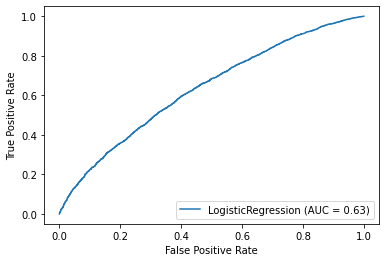

In [7]:
plot_roc_curve(model_logistic, dota_features_test, dota_win_test)
print(model_logistic.coef_)

There is a lot to unpack here.

At first we can see that our roc curve is bad, this means that our model is almost guessing at random.

Also we can observe, that not all of the heroes have equal coeficients. At first this seems logical, as different heroes should in theory have different winrates, but our differences are drastic. And is it a coincidence that some of our coeficients are =0?

Let us compare our first three heroes, starting from the front, and our sixth, starting from the back.

In [8]:
print(sum(1 if x!=0 else 0 for x in dota_features_train["antimage"]))
print(sum(1 if x!=0 else 0 for x in dota_features_train["axe"]))
print(sum(1 if x!=0 else 0 for x in dota_features_train["bane"]))
print(sum(1 if x!=0 else 0 for x in dota_features_train["abyssal_underlord"]))

14973
20264
2524
0


Here we see a big problem: Player preference. 

While it is true, that some heroes are more preferable to others, in a dataset with so many possibilities, this is a problem. We can see that one of our heroes hasn't been picked even once! This is a major problem for our model, as it mirrors the bias of the players, meaning that if it had to guess the outcome of a game, with that hero present, it would be up to chance, whether it would be succesful.

Let's do some math.

A match of Dota 2 has 10 players. Every player picks a hero from 113 possibilites, according to our data.

That means, that all possible matches are:

In [9]:
print(113*112*111*110*109 * 108*107*106*105*104)

225306989591985100800


That is 225.3 Quintillion! What a huge number!

But bad for us, as our model is highly biased towards the most-picked heroes.

### 2.4 Retrospect

Well, our first attempt was a flop. We could try collecting more data, but I highly doubt we could achieve better results in the foreseeable future. And even if we did - this data does not take into account the skill of the players, playing the game.

Well, what now?

We search for another opportunity.

## 3. Optimisiation

While it is true, that with enough data our first model will improve, but we shoud also take into account the fact, that the data does not account for player skill. In the best-case scenarion our model would be giving averages based on hero winrate, but in any other case it would be wildely inaccurate.

Let's try another dataset and see if we run into a this problem again.

### 3.1 Second dataset and model

This time we will explore a dataset with less atributes. The chess dataset includes a bit over 10000 games of professional chess. Let's import our data and take a look.

In [10]:
chess_data = pd.read_csv("data/chess_data.csv")
chess_data

,N,Date,Event Name,Event Rounds,Round,White Name,Black Name,Result,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Evaluations List,White CP Loss List,Black CP Loss List,PGN,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
0,0,3/28/2018,Philadelphia op 12th,9,1,"Niemann, Hans Moke","Oberoi, Shelev",0,2302.0,1924.0,39.0,22.0,46.0,"[47, 43, 44, -9, 17, 10, 5, 0, 12, -30, -13, -...","[4, 53, 7, 5, 42, 38, 0, 13, 135, 0, 0, 5, 0, ...","[1, 26, 0, 12, 17, 10, 19, 14, 35, 12, 10, 11,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
1,0,3/29/2018,Philadelphia op 12th,9,2,"Niemann, Hans Moke","Popilski, Gil",1,2302.0,2502.0,36.0,12.0,13.0,"[46, 36, 46, 35, 50, 36, 62, 47, 59, 38, 57, 5...","[10, 11, 14, 15, 21, 1, 31, 36, 2, 25, 11, 28,...","[10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
2,0,3/29/2018,Philadelphia op 12th,9,3,"Gorovets, Andrey","Niemann, Hans Moke",2,2496.0,2302.0,50.0,46.0,28.0,"[37, 27, 49, 6, 35, 12, 22, 18, 33, 13, 29, 19...","[10, 43, 23, 4, 20, 10, 12, 3, 9, 24, 10, 49, ...","[22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
3,0,3/30/2018,Philadelphia op 12th,9,4,"Tang, Andrew","Niemann, Hans Moke",0,2509.0,2302.0,38.0,22.0,38.0,"[46, 26, 40, 37, 96, 67, 151, 114, 138, 125, 1...","[20, 3, 29, 37, 13, 51, 24, 33, 8, 45, 10, 31,...","[14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
4,0,3/30/2018,Philadelphia op 12th,9,5,"Niemann, Hans Moke","Balakrishnan, Praveen",2,2302.0,2405.0,39.0,23.0,7.0,"[35, 27, 48, 23, 36, 20, 46, 8, 25, 31, 38, -5...","[8, 25, 16, 38, 0, 92, 6, 0, 1, 2, 0, 7, 0, 30...","[21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,0,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Lenderman, Aleksandr","Sevian, Samuel",1,2535.0,2684.0,36.0,6.0,5.0,"[49, 28, 41, 21, 61, 34, 45, 43, 59, 42, 51, 4...","[21, 20, 27, 2, 17, 8, 0, 6, 5, 21, 0, 10, 18,...","[13, 40, 11, 16, 9, 9, 0, 4, 7, 10, 1, 10, 0, ...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,3147.0,3176.0
10619,0,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Aronian, Levon","Dominguez Perez, Leinier",1,2755.0,2747.0,34.0,15.0,15.0,"[49, 41, 33, 35, 48, 40, 40, 59, 44, 37, 46, 3...","[8, 0, 8, 0, 7, 9, 14, 10, 28, 11, 16, 4, 3, 0...","[0, 13, 0, 0, 9, 10, 8, 39, 21, 6, 4, 6, 0, 0,...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,2882.0,2882.0
10620,0,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Moradiabadi, Elshan","Liang, Awonder",*,2534.0,2608.0,61.0,20.0,30.0,"[49, 41, 33, 35, 36, 28, 50, 41, 48, 35, 53, 3...","[8, 0, 8, 9, 13, 16, 0, 14, 3, 14, 25, 12, 5, ...","[0, 1, 22, 7, 18, 9, 9, 3, 0, 6, 7, 15, 13, 75...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,2735.0,2441.0
10621,0,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Swiercz, Dariusz","Shankland, Sam",1,2652.0,2712.0,47.0,6.0,5.0,"[49, 28, 41, 21, 57, 21, 36, 30, 37, 39, 37, 4...","[21, 20, 36, 6, 0, 0, 0, 29, 14, 18, 0, 0, 5, ...","[13, 36, 15, 7, 0, 0, 10, 21, 11, 15, 0, 8, 2,...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,3147.0,3176.0


This dataset is a lot more comprehensive, hence we have to simplify it a bit, before using it as a basis for our model. First we have to clean up or replace missing values and remove errors.

Let's start from our first atribute.

It is called N and has the descriptions of some games, but it has to be removed, because according to the documentation it is supposed to contain the number of the game, but we can actualy check that and see.

In [11]:
print(chess_data.N.unique())

['0' nan ' again resembles (and can'
 'transposes into) 10.g4 Nxd4. Black equalized after }'
 '12. Qxd4 Rc8 13. Rd2 Bc5 14. Qxc5 Qxc5 15. Bxc5 Rxc5 16. h4 Ke7 17. a4 b4 18.'
 'Na2 b3 19. Nc3 bxc2+ 20. Rxc2 d6 21. b4 Rcc8 22. Be2 h6 23. Rhc1 g5 24. h5 Nd7'
 '$11 { Tazbir' '#NAME?' 'Qb6 12. Nb3 $1 $14 { [%cal Re4e5] } ) 12. Nf5 ('
 '{ The bishop sortie makes no sense after } 12. Nxc6 dxc6 $11 ) 12... exf4 13.'
 'Nd5 Nxd5 ( 13... Qb8 14. Nxg7+ Kf8 15. Nf5 $44 { [%csl Rf8] } ) 14. exd5 Nb4'
 '15. c4 $1 ( 15. Nxe7 Qxc2+ 16. Qxc2 Nxc2 $15 ) (' '{ White has higher'
 'ambitions than } 15. d6 Qxc2+ 16. Qxc2 Nxc2 17. Nxg7+ Kf8'
 '18. dxe7+ Kxg7 19. Kxc2 Bc6 20. Rd4 Rhe8 $11 ) 15... Bd6 ( 15... Bc5 16. a3'
 'Nxd5 17. cxd5 O-O 18. d6 Qb6 19. Qxf4 $36 ) 16. a3 ( 16. Nxg7+ $5 Kf8 17. Nf5'
 '$13 ) 16... Be5 ( 16... O-O $5 17. Nxd6 Qxd6 18. Qxb4 Qg6+ $132 ) 17. Qxb4 ('
 '17. d6 $1 $14 ) 17... d6 18. cxb5 O-O 19. g3 axb5 20. Bxb5 Rfb8 $2 ( 20... Bc8'
 '$142 21. Nd4 $14 { /<=> } ) 21. gxf4 Bc8 22. Nh6+ 

Wow! This cell is kind of unusable, as our models cant extract any information out of it, so we have to remove it.

In [12]:
chess_data = chess_data.drop(['N'], axis = 1)

In [13]:
chess_data

,Date,Event Name,Event Rounds,Round,White Name,Black Name,Result,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Evaluations List,White CP Loss List,Black CP Loss List,PGN,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
0,3/28/2018,Philadelphia op 12th,9,1,"Niemann, Hans Moke","Oberoi, Shelev",0,2302.0,1924.0,39.0,22.0,46.0,"[47, 43, 44, -9, 17, 10, 5, 0, 12, -30, -13, -...","[4, 53, 7, 5, 42, 38, 0, 13, 135, 0, 0, 5, 0, ...","[1, 26, 0, 12, 17, 10, 19, 14, 35, 12, 10, 11,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
1,3/29/2018,Philadelphia op 12th,9,2,"Niemann, Hans Moke","Popilski, Gil",1,2302.0,2502.0,36.0,12.0,13.0,"[46, 36, 46, 35, 50, 36, 62, 47, 59, 38, 57, 5...","[10, 11, 14, 15, 21, 1, 31, 36, 2, 25, 11, 28,...","[10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
2,3/29/2018,Philadelphia op 12th,9,3,"Gorovets, Andrey","Niemann, Hans Moke",2,2496.0,2302.0,50.0,46.0,28.0,"[37, 27, 49, 6, 35, 12, 22, 18, 33, 13, 29, 19...","[10, 43, 23, 4, 20, 10, 12, 3, 9, 24, 10, 49, ...","[22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
3,3/30/2018,Philadelphia op 12th,9,4,"Tang, Andrew","Niemann, Hans Moke",0,2509.0,2302.0,38.0,22.0,38.0,"[46, 26, 40, 37, 96, 67, 151, 114, 138, 125, 1...","[20, 3, 29, 37, 13, 51, 24, 33, 8, 45, 10, 31,...","[14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
4,3/30/2018,Philadelphia op 12th,9,5,"Niemann, Hans Moke","Balakrishnan, Praveen",2,2302.0,2405.0,39.0,23.0,7.0,"[35, 27, 48, 23, 36, 20, 46, 8, 25, 31, 38, -5...","[8, 25, 16, 38, 0, 92, 6, 0, 1, 2, 0, 7, 0, 30...","[21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Lenderman, Aleksandr","Sevian, Samuel",1,2535.0,2684.0,36.0,6.0,5.0,"[49, 28, 41, 21, 61, 34, 45, 43, 59, 42, 51, 4...","[21, 20, 27, 2, 17, 8, 0, 6, 5, 21, 0, 10, 18,...","[13, 40, 11, 16, 9, 9, 0, 4, 7, 10, 1, 10, 0, ...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,3147.0,3176.0
10619,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Aronian, Levon","Dominguez Perez, Leinier",1,2755.0,2747.0,34.0,15.0,15.0,"[49, 41, 33, 35, 48, 40, 40, 59, 44, 37, 46, 3...","[8, 0, 8, 0, 7, 9, 14, 10, 28, 11, 16, 4, 3, 0...","[0, 13, 0, 0, 9, 10, 8, 39, 21, 6, 4, 6, 0, 0,...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,2882.0,2882.0
10620,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Moradiabadi, Elshan","Liang, Awonder",*,2534.0,2608.0,61.0,20.0,30.0,"[49, 41, 33, 35, 36, 28, 50, 41, 48, 35, 53, 3...","[8, 0, 8, 9, 13, 16, 0, 14, 3, 14, 25, 12, 5, ...","[0, 1, 22, 7, 18, 9, 9, 3, 0, 6, 7, 15, 13, 75...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,2735.0,2441.0
10621,10/6/2022,U.S. Chess Championship 2022,NaN,2,"Swiercz, Dariusz","Shankland, Sam",1,2652.0,2712.0,47.0,6.0,5.0,"[49, 28, 41, 21, 57, 21, 36, 30, 37, 39, 37, 4...","[21, 20, 36, 6, 0, 0, 0, 29, 14, 18, 0, 0, 5, ...","[13, 36, 15, 7, 0, 0, 10, 21, 11, 15, 0, 8, 2,...","[Event ""U.S. Chess Championship 2022""]\n[Site ...",22.0,3147.0,3176.0


Moving on, we have to split our dataset into two parts - our features and our output.

The Interesting thing is, that we do not need all atributes. We don't need the names of the players or the names of the events, as the data that is of real interest is the ELO - the skill ranking of the player, as well as our evaluations and cp loss, which we'll get into later.

Our new data will be split into two new datasets, as we want to contain the original dataset for reproducability purposes.

In [14]:
chess_features = chess_data.drop(['Date', 'Event Name', 'Black Name', 'White Name', 'PGN', 'Result', 'Evaluations List', 'White CP Loss List', 'Black CP Loss List'], axis = 1)
chess_result = chess_data.Result
chess_features

,Event Rounds,Round,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
0,9,1,2302.0,1924.0,39.0,22.0,46.0,20.0,NaN,NaN
1,9,2,2302.0,2502.0,36.0,12.0,13.0,20.0,NaN,NaN
2,9,3,2496.0,2302.0,50.0,46.0,28.0,20.0,NaN,NaN
3,9,4,2509.0,2302.0,38.0,22.0,38.0,20.0,NaN,NaN
4,9,5,2302.0,2405.0,39.0,23.0,7.0,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10618,NaN,2,2535.0,2684.0,36.0,6.0,5.0,22.0,3147.0,3176.0
10619,NaN,2,2755.0,2747.0,34.0,15.0,15.0,22.0,2882.0,2882.0
10620,NaN,2,2534.0,2608.0,61.0,20.0,30.0,22.0,2735.0,2441.0
10621,NaN,2,2652.0,2712.0,47.0,6.0,5.0,22.0,3147.0,3176.0


Well, now we have a formated dataset, but nevertheless it might still need a bit formating, but well do that as we go along.

First of all we have to deal with missing data. Lets check how much missing data is there in the obvious atributes.

In [15]:
chess_features['Event Rounds'].unique()

array(['9', '7', '11', '3', '5', '10', '13', '15', '4', '21', '2', '14',
       '12', '1', '8', '6', nan,
       'C (2175)/email/2009/ } ) 13... d5 ( 13... g5', '22'], dtype=object)

Here we can see an anomaly! One of the cells contains information that shouldn't be here. We are going to have to remove or replace it.

In [16]:
print(chess_features.index[chess_features['Event Rounds'] ==  'C (2175)/email/2009/ } ) 13... d5 ( 13... g5'])

Int64Index([6686], dtype='int64')


In [17]:
chess_features.loc['6782':]

,Event Rounds,Round,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
6782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6785,9,3,2881.0,2791.0,67.0,18.0,18.0,20.0,NaN,NaN
6786,9,4,2791.0,2752.0,53.0,20.0,20.0,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10618,NaN,2,2535.0,2684.0,36.0,6.0,5.0,22.0,3147.0,3176.0
10619,NaN,2,2755.0,2747.0,34.0,15.0,15.0,22.0,2882.0,2882.0
10620,NaN,2,2534.0,2608.0,61.0,20.0,30.0,22.0,2735.0,2441.0
10621,NaN,2,2652.0,2712.0,47.0,6.0,5.0,22.0,3147.0,3176.0


Here we can see an error in the dataset. There are some reccords, that are entirely empty. This means we have to remove them.

Checking the dataset we can see that the error stretches from index 6642 to 6784. We have to remove them.

In [18]:
chess_features.drop(chess_features.index[6642:6785], inplace=True)
chess_result.drop(chess_result.index[6642:6785], inplace=True)
print(chess_features.shape)
print(chess_result.shape)

(10480, 10)
(10480,)


In [19]:
chess_features.loc["6640":]

,Event Rounds,Round,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
6640,9,1,2792.0,2791.0,39.0,27.0,13.0,20.0,NaN,NaN
6641,9,2,2791.0,2753.0,39.0,22.0,32.0,NaN,NaN,NaN
6785,9,3,2881.0,2791.0,67.0,18.0,18.0,20.0,NaN,NaN
6786,9,4,2791.0,2752.0,53.0,20.0,20.0,20.0,NaN,NaN
6787,9,5,2783.0,2791.0,52.0,10.0,20.0,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10618,NaN,2,2535.0,2684.0,36.0,6.0,5.0,22.0,3147.0,3176.0
10619,NaN,2,2755.0,2747.0,34.0,15.0,15.0,22.0,2882.0,2882.0
10620,NaN,2,2534.0,2608.0,61.0,20.0,30.0,22.0,2735.0,2441.0
10621,NaN,2,2652.0,2712.0,47.0,6.0,5.0,22.0,3147.0,3176.0


Now, we fixed our error, but we have NaN values. We need to remove them before creating our model.

In [20]:
print(chess_features.index[chess_features['Round'] ==  '?'])
chess_features['Round'] = chess_features['Round'].replace('?' , np.NaN)
chess_features['Round'] = chess_features['Round'].replace(np.NaN, chess_features['Round'].median())
chess_result = chess_result.replace('*' , '0')

Int64Index([ 706,  707,  708,  709,  710,  711,  712,  713,  714,  715,  716,
             717,  718, 5179, 5180, 5181, 5182, 5183, 5184, 5185, 8175, 8176,
            8177, 8178, 8179, 8180, 9092, 9093, 9094],
           dtype='int64')


In [21]:
chess_features['Event Rounds'] = chess_features['Event Rounds'].replace(np.NaN ,chess_features['Event Rounds'].median())
chess_features = chess_features.astype(float)

In [22]:
chess_features['White Expected Rating by ACPL'].fillna(chess_features['White ELO'], inplace=True)
chess_features['Black Expected Rating by ACPL'].fillna(chess_features['Black ELO'], inplace=True)
chess_features['Analysis Depth'] = chess_features['Analysis Depth'].replace(np.NaN, chess_features['Analysis Depth'].median())

In [23]:
chess_features['Round'] = chess_features['Round'].astype(float)
chess_features['Event Rounds'] = chess_features['Event Rounds'].astype(float)

In [24]:
chess_features.isnull().values.any()

False

Now our dataset is finally ready! We can extract the dummies and split our data.

In [25]:
chess_features_dummies = pd.get_dummies(chess_features)
chess_result_dummies = pd.get_dummies(chess_result)
chess_features_train, chess_features_test, chess_result_train, chess_result_test = train_test_split(
    chess_features, chess_result, train_size = 0.7, test_size = 0.3)

And now we build and run our model. It will be logistic regression with high C, so we have little regularisation. 

In [26]:
model_logistic = LogisticRegression(C = 1e9)
model_logistic.fit(chess_features_train, chess_result_train)
score_logistic = f1_score(chess_result_test, model_logistic.predict(chess_features_test), average='weighted')
print(score_logistic)

0.9396166247469919


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.2 Analyisng Results and Data

(during testing score varied from 9.6 to 8.8, if it is lower that means the testing data got split badly)

Wow! Our model is quite robust! Even so, it is actualy VERY biased! Why? To answer that we need to take a closer look at our data.

Lets plot the ELOs of our players.

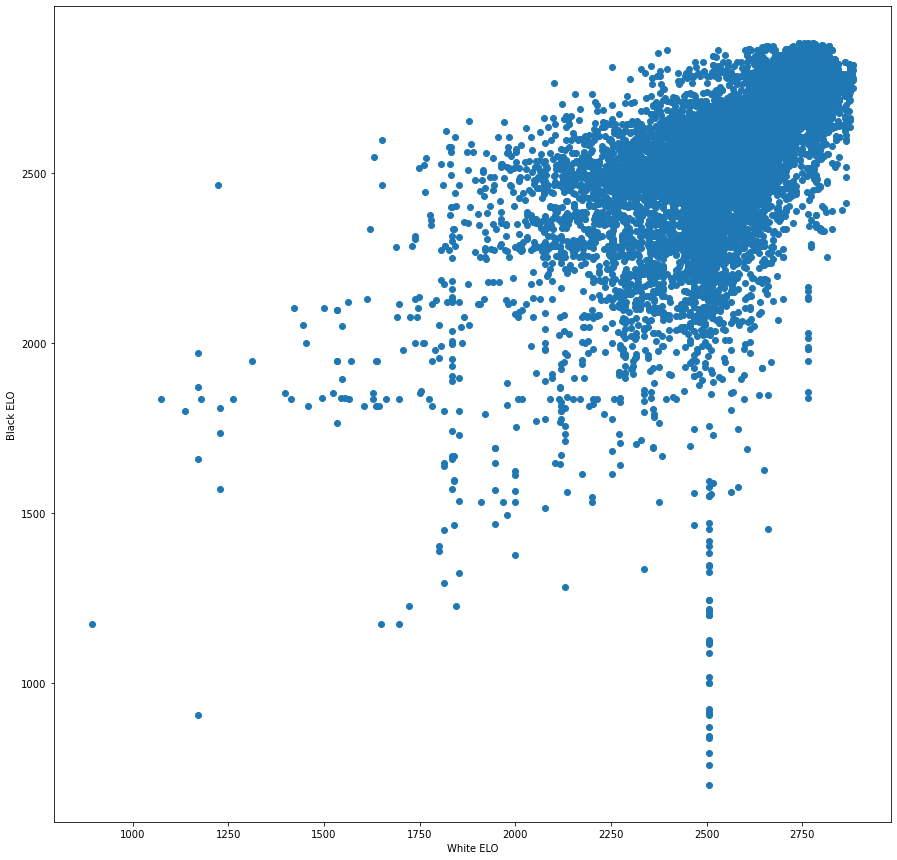

In [27]:
white_elo = chess_features["White ELO"]
black_elo = chess_features["Black ELO"]

f = plt.figure()
plt.xlabel('White ELO')
plt.ylabel('Black ELO')
f.set_figwidth(15)
f.set_figheight(15)

plt.scatter(white_elo, black_elo)
plt.show()

As we can see, our data is highly concentrated on the upper levels of skill in chess, this means that it will be inaccurate for lower level players.

Let's see the average ELO.

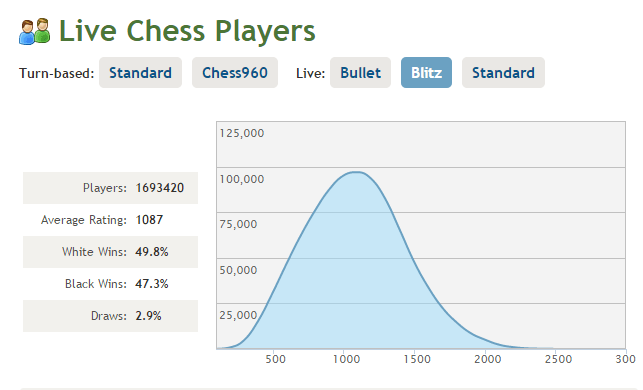

In [28]:
Image(filename='data/elo_chart.png') 

In [29]:
(chess_features["White ELO"].mean() + chess_features["Black ELO"].mean()) / 2 - 1087

1443.6068702290077

We can see that our average is much higher than the actual average. In fact it is almost 150% higher! This means that on our test data it will perform amazingly, but it will flop when predicting most games.

### 3.3 Impoving our model

Now we can try to improve our model further. We will use grid search and we will use f1 scoring.

First we will scale our data. This might improve our results.

In [30]:
chess_features_scaled = MinMaxScaler().fit_transform(chess_features_dummies)
chess_features_train_scaled, chess_features_test_scaled, chess_result_train, chess_result_test = train_test_split(
    chess_features_scaled, chess_result, train_size = 0.7, test_size = 0.3)

In [31]:
model_logistic.fit(chess_features_train_scaled, chess_result_train)
score_logistic_scaled = f1_score(chess_result_test, model_logistic.predict(chess_features_test_scaled), average='weighted')
print(score_logistic_scaled - score_logistic)

-0.000892379177465874


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Alright, a slight improvement. Now we should grid search for even more optimal results

(Below is a picture with my results, you can also run the code, but I don't recommend it!)

(also also grid search returns either c = 1000 or c = 10000, so you can try them both)

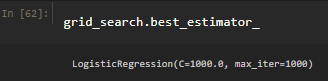

In [32]:
Image(filename="data/grid_search_results.png")

In [33]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "C": [0.001, 0.01, 1, 1e3, 1e6],
        "fit_intercept": [True, False],
        "max_iter":[100,1000,10000],
    },
    scoring="f1_weighted"
)

In [34]:
grid_search.fit(chess_features_train, chess_result_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 1000.0, 1000000.0],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 1000, 10000]},
             scoring='f1_weighted')

In [35]:
grid_search.best_estimator_

LogisticRegression(C=1000000.0, max_iter=1000)

In [36]:
model_logistic = LogisticRegression(C=1000.0, max_iter=1000)
model_logistic.fit(chess_features_train_scaled, chess_result_train)
score_logistic_grid = f1_score(chess_result_test, model_logistic.predict(chess_features_test_scaled), average='weighted')

In [37]:
print(score_logistic_grid - score_logistic_scaled)
print(score_logistic_grid - score_logistic)
print(score_logistic_grid)

0.016460296117334794
0.01556791693986892
0.9551845416868608


## 3.4 Final Analysis

We have made our model good in predicting the outcome, but only in professional level matches, and even then, it is not perfect. Despite the quality of our data, we cannot go much further than this. This means it is time to wrap up and see what we have learned.

# 4. Answering the Question

We found out, that with enough data, we can almost train a model to perfection, but that was because there weren't that many factors in determening the chess games. When it came to a 5v5 sport like dota espord, we saw that the dimentionality of our factors increased rapidly and we weren't able to make a solid model. So to answer the question - it depends.

Regression can only go so far in predicting outcomes and sports has many other factors, that we can't really put into datasets just yet. For example, the mood of the player can have an effect on their performance.

We have to decide for each sport, if it is accurately predictable with regression or not, but even in all of their complexity, can deep learning alorithms perform better? Maybe in a few months we can try to answer that question.

## CITATIONS

Dota 2 dataset - pulled from the UCI repository, Authors:(no real names cited, so i'll use github tags) kronusme, akrz, aldidoanta, cbighea and others(only one commit)

Chess dataset - pulled from kaggle, Authors: Tom Pulat, Mayank Jagtap, Barış Can Tayiz

Chess average elo chart and analysis - notmtwain in chess.com forums using chess.com system